In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
calibracao = np.genfromtxt(
    'calibracao.txt', 
    dtype=([('Cf', '<i8'), ('Lado', 'S1'), ('X', '<f8'), ('Y', '<f8')]))

In [3]:
lados = [b'E', b'T', b'D', b'B']
shift_x = [-1.3, 0, 1.3, 0]
shift_y = [0, 1.3, 0, -1.3]

In [4]:
X = []
Y = []
for lado, sx, sy in zip(lados, shift_x, shift_y):
    mask = (calibracao['Lado'] == lado)
    X.append(calibracao['X'][mask] + sx)
    Y.append(calibracao['Y'][mask] + sy)
X = np.hstack(X)
Y = np.hstack(Y)

In [5]:
Bx = []
By = []
Bz = []
for i in calibracao['Cf']:
    filename = 'Cf{}.csv'.format(i)
    B = np.genfromtxt(filename, delimiter=',', usecols=(1,2,3), skip_header=1)
    B = np.mean(B, axis=0)
    Bx.append(B[0])
    By.append(B[1])
    Bz.append(B[2])
Bx = np.array(Bx)
By = np.array(By)
Bz = np.array(Bz)

In [6]:
Bx0 = []
By0 = []
Bz0 = []
for i in range(4):
    filename = 'Sf{}.csv'.format(i)
    B = np.genfromtxt(filename, delimiter=',', usecols=(1,2,3), skip_header=1)
    B = np.mean(B, axis=0)
    Bx0.append(B[0])
    By0.append(B[1])
    Bz0.append(B[2])
Bx0 = np.median(np.array(Bx0))
By0 = np.median(np.array(By0))
Bz0 = np.median(np.array(Bz0))

In [7]:
Bx = Bx - Bx0
By = By - By0
Bz = Bz - Bz0

In [8]:
Btotal = np.sqrt(Bx**2 + By**2 + Bz**2)

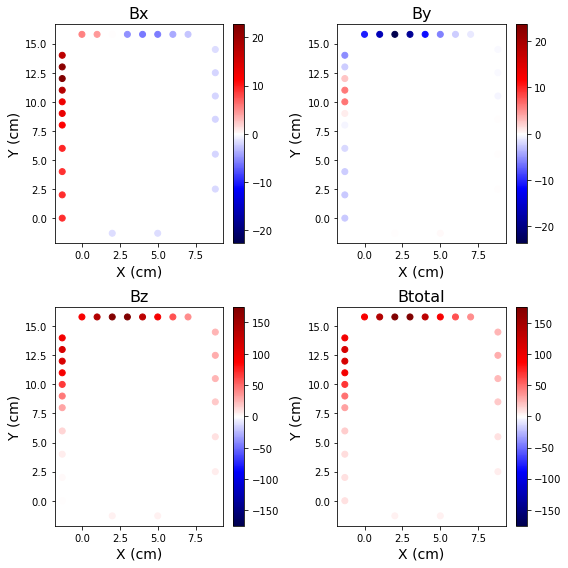

In [9]:
dados = [Bx, By, Bz, Btotal]
title = ['Bx', 'By', 'Bz', 'Btotal']
ranges = [np.max(np.abs(Bx)),
          np.max(np.abs(By)),
          np.max(np.abs(Bz)),
          np.max(np.abs(Btotal))]

plt.figure(figsize=(8,8))

for index in range(1,5):

    plt.subplot(2,2,index)
    plt.title(title[index-1], fontsize=16)
    plt.scatter(X, Y, c=dados[index-1], 
                cmap='seismic', vmin=-ranges[index-1], vmax=ranges[index-1])
    plt.colorbar()
    plt.xlabel('X (cm)', fontsize = 14)
    plt.ylabel('Y (cm)', fontsize = 14)
plt.tight_layout()
plt.show()